### Importing Libraries and Listing Dataset Files
I import the necessary libraries:
- **NumPy** for numerical operations  
- **Pandas** for data manipulation and analysis  
- **Matplotlib** for data visualization  

I also traverse the input directory using `os.walk()` to display all available dataset files in the Kaggle environment.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/m5-data/calendar.csv
/kaggle/input/m5-data/sample_submission.csv
/kaggle/input/m5-data/sell_prices.csv
/kaggle/input/m5-data/sales_train_validation.csv
/kaggle/input/m5-data/sales_train_evaluation.csv


### Loading the Datasets
I load the M5 competition datasets using `pandas.read_csv()`:
- **sell_prices.csv** → Contains information about product prices across stores.  
- **sample_submission.csv** → Template file for submission format.  
- **calendar.csv** → Provides calendar and event-related information.  
- **sales_train_validation.csv** → Historical daily unit sales data for products.  


In [2]:
sell_prices = pd.read_csv('/kaggle/input/m5-data/sell_prices.csv')
sample_submission = pd.read_csv('/kaggle/input/m5-data/sample_submission.csv')
calendar = pd.read_csv('/kaggle/input/m5-data/calendar.csv')
sales_train_validation = pd.read_csv('/kaggle/input/m5-data/sales_train_validation.csv')

### Exploring the Datasets
I perform initial exploration of the data:  
- `head()` → Displays the first few rows of the dataset for a quick preview of its structure.  
- `info()` → Provides details about column names, data types, and non-null counts.  

Here, I inspect both **sell_prices** and **sales_train_validation** to understand their schema and contents before analysis.  


In [3]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [4]:
sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [5]:
sales_train_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [6]:
sales_train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [7]:
sales_train_validation['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

### Store-wise Aggregation of Sales
I group the `sales_train_validation` dataset by **store_id** and compute the total sales for each store.  
This helps in understanding the overall sales distribution across different stores.  


In [8]:
sales_train_validation.groupby(sales_train_validation['store_id']).sum()

,id,item_id,dept_id,cat_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,HOBBIES_1_001_CA_1_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,4337,4155,2816,3051,2630,...,3982,5437,5954,4345,3793,3722,3709,4387,5577,6113
CA_2,HOBBIES_1_001_CA_2_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,3494,3046,2121,2324,1942,...,4440,5352,5760,3830,3631,3691,3303,4457,5884,6082
CA_3,HOBBIES_1_001_CA_3_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,4739,4827,3785,4232,3817,...,5337,6936,8271,6068,5683,5235,5018,5623,7419,7721
CA_4,HOBBIES_1_001_CA_4_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,1625,1777,1386,1440,1536,...,2496,2839,3047,2809,2677,2500,2458,2628,2954,3271
TX_1,HOBBIES_1_001_TX_1_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,2556,2687,1822,2258,1694,...,3084,3724,4192,3410,3257,2901,2776,3022,3700,4033
TX_2,HOBBIES_1_001_TX_2_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,3852,3937,2731,2954,2492,...,3897,4475,4998,3311,3727,3384,3446,3902,4483,4292
TX_3,HOBBIES_1_001_TX_3_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,3030,3006,2225,2169,1726,...,3819,4261,4519,3147,3938,3315,3380,3691,4083,3957
WI_1,HOBBIES_1_001_WI_1_validationHOBBIES_1_002_WI_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,2704,2194,1562,1251,2,...,3862,4862,4812,3236,3069,3242,3324,3991,4772,4874
WI_2,HOBBIES_1_001_WI_2_validationHOBBIES_1_002_WI_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,2256,1922,2018,2522,1175,...,6259,5579,5566,4347,4464,4194,4393,4988,5404,5127


### Transforming Sales Data to Store Level
- First, I group the sales data by **store_id** and calculate the total sales.  
- Then, I transpose the DataFrame so that **days (d)** become rows instead of columns.  
- Finally, I add an index column `d` to clearly represent the day-wise sales for each store.  

This transformation makes it easier for me to analyze and visualize store-level sales trends over time.  
  


In [9]:
store_level = sales_train_validation.groupby(sales_train_validation['store_id']).sum()
store_level['d'] = store_level.index
store_levelt = store_level.transpose() 
store_levelt['d'] = store_levelt.index
store_levelt

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,d
id,HOBBIES_1_001_CA_1_validationHOBBIES_1_002_CA_...,HOBBIES_1_001_CA_2_validationHOBBIES_1_002_CA_...,HOBBIES_1_001_CA_3_validationHOBBIES_1_002_CA_...,HOBBIES_1_001_CA_4_validationHOBBIES_1_002_CA_...,HOBBIES_1_001_TX_1_validationHOBBIES_1_002_TX_...,HOBBIES_1_001_TX_2_validationHOBBIES_1_002_TX_...,HOBBIES_1_001_TX_3_validationHOBBIES_1_002_TX_...,HOBBIES_1_001_WI_1_validationHOBBIES_1_002_WI_...,HOBBIES_1_001_WI_2_validationHOBBIES_1_002_WI_...,HOBBIES_1_001_WI_3_validationHOBBIES_1_002_WI_...,id
item_id,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,item_id
dept_id,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,dept_id
cat_id,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,cat_id
state_id,CACACACACACACACACACACACACACACACACACACACACACACA...,CACACACACACACACACACACACACACACACACACACACACACACA...,CACACACACACACACACACACACACACACACACACACACACACACA...,CACACACACACACACACACACACACACACACACACACACACACACA...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,state_id
...,...,...,...,...,...,...,...,...,...,...,...
d_1910,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226,d_1910
d_1911,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828,d_1911
d_1912,5577,5884,7419,2954,3700,4483,4083,4772,5404,4686,d_1912
d_1913,6113,6082,7721,3271,4033,4292,3957,4874,5127,4325,d_1913


### Viewing Store-Level Aggregated Data
I display the `store_level` DataFrame, which contains the total sales aggregated for each store across all products and days.  
This gives me a clear view of overall sales performance by store.  


In [10]:
store_level

,id,item_id,dept_id,cat_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,HOBBIES_1_001_CA_1_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,4337,4155,2816,3051,2630,...,5437,5954,4345,3793,3722,3709,4387,5577,6113,CA_1
CA_2,HOBBIES_1_001_CA_2_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,3494,3046,2121,2324,1942,...,5352,5760,3830,3631,3691,3303,4457,5884,6082,CA_2
CA_3,HOBBIES_1_001_CA_3_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,4739,4827,3785,4232,3817,...,6936,8271,6068,5683,5235,5018,5623,7419,7721,CA_3
CA_4,HOBBIES_1_001_CA_4_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,1625,1777,1386,1440,1536,...,2839,3047,2809,2677,2500,2458,2628,2954,3271,CA_4
TX_1,HOBBIES_1_001_TX_1_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,2556,2687,1822,2258,1694,...,3724,4192,3410,3257,2901,2776,3022,3700,4033,TX_1
TX_2,HOBBIES_1_001_TX_2_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,3852,3937,2731,2954,2492,...,4475,4998,3311,3727,3384,3446,3902,4483,4292,TX_2
TX_3,HOBBIES_1_001_TX_3_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,3030,3006,2225,2169,1726,...,4261,4519,3147,3938,3315,3380,3691,4083,3957,TX_3
WI_1,HOBBIES_1_001_WI_1_validationHOBBIES_1_002_WI_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,2704,2194,1562,1251,2,...,4862,4812,3236,3069,3242,3324,3991,4772,4874,WI_1
WI_2,HOBBIES_1_001_WI_2_validationHOBBIES_1_002_WI_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,2256,1922,2018,2522,1175,...,5579,5566,4347,4464,4194,4393,4988,5404,5127,WI_2


### Exploring Calendar Data
I use `calendar.info()` to check the structure of the calendar dataset.  
This shows me the column names, data types, and non-null counts, helping me understand the event and date-related information available.  


In [11]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


### Merging Store-Level Data with Calendar
- I merge the transposed store-level sales data with the **calendar dataset** using the `d` column as the key.  
- I then convert the `date` column from string format to Python `datetime` objects for easier time-based analysis.  
- Finally, I display the merged DataFrame, which now combines sales with calendar information.  


In [12]:
#Merge this with the calendar data set to look at trends
store_level_final = store_levelt.merge(calendar, on='d')
from datetime import datetime
store_level_final['date'] = store_level_final['date'].apply(lambda t: datetime.strptime(t, '%Y-%m-%d'))
store_level_final

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,3722,3691,5235,2500,2901,3384,3315,3242,4194,3159,...,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226,...,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828,...,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,5577,5884,7419,2954,3700,4483,4083,4772,5404,4686,...,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


### Merging Transposed Store-Level Data with Calendar
I merge the transposed store-level sales data (`store_levelt`) with the **calendar** dataset on the `d` column.  
This allows me to combine daily sales information with corresponding calendar details such as dates and events.  


In [13]:
store_levelt.merge(calendar, on='d')

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,3722,3691,5235,2500,2901,3384,3315,3242,4194,3159,...,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226,...,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828,...,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,5577,5884,7419,2954,3700,4483,4083,4772,5404,4686,...,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


### Inspecting the Merged Data
I use `store_level_final.info()` to check the structure of the merged DataFrame.  
This helps me verify the column names, data types, and non-null counts after combining sales and calendar information.  


In [14]:
store_level_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CA_1          1913 non-null   object        
 1   CA_2          1913 non-null   object        
 2   CA_3          1913 non-null   object        
 3   CA_4          1913 non-null   object        
 4   TX_1          1913 non-null   object        
 5   TX_2          1913 non-null   object        
 6   TX_3          1913 non-null   object        
 7   WI_1          1913 non-null   object        
 8   WI_2          1913 non-null   object        
 9   WI_3          1913 non-null   object        
 10  d             1913 non-null   object        
 11  date          1913 non-null   datetime64[ns]
 12  wm_yr_wk      1913 non-null   int64         
 13  weekday       1913 non-null   object        
 14  wday          1913 non-null   int64         
 15  month         1913 non-null   int64   

### Visualizing Sales for a Store
I plot the daily sales of **store CA_1** for the first 49 days using `matplotlib`.  
- The x-axis represents the dates, and the y-axis represents the sales.  
- I rotate the x-axis labels by 45° for better readability.  


(array([15006., 15013., 15020., 15027., 15034., 15041., 15048.]),
 [Text(15006.0, 0, '2011-02-01'),
  Text(15013.0, 0, '2011-02-08'),
  Text(15020.0, 0, '2011-02-15'),
  Text(15027.0, 0, '2011-02-22'),
  Text(15034.0, 0, '2011-03-01'),
  Text(15041.0, 0, '2011-03-08'),
  Text(15048.0, 0, '2011-03-15')])

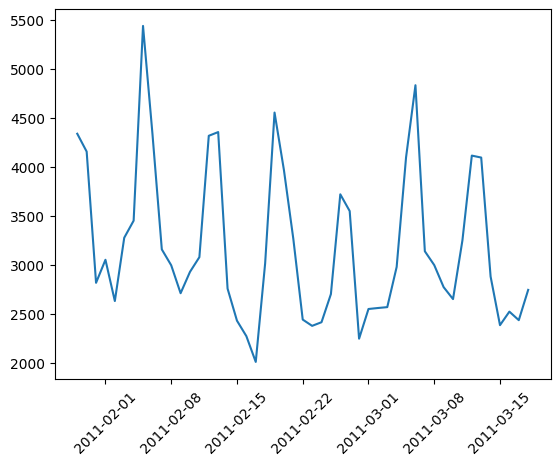

In [15]:
plt.plot(store_level_final['date'][0:49], store_level_final['CA_1'][0:49])
plt.xticks(rotation=45)

### Analyzing Weekly Sales Pattern
I plot the sales of **store CA_1** for the first 7 days against the **weekday**.  
- This helps me observe how sales vary across different days of the week.  
- The x-axis labels are rotated 45° for better readability.  


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

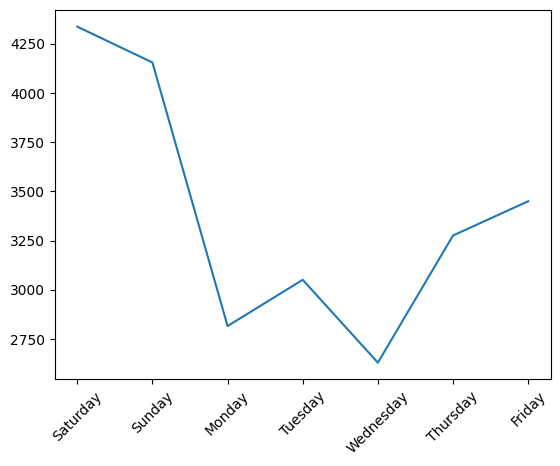

In [16]:
plt.plot(store_level_final['weekday'][0:7], store_level_final['CA_1'][0:7])
plt.xticks(rotation=45)

### Testing Time Series Stationarity
I define a function `test_stationarity()` to check whether a time series is stationary.  
- It calculates the **rolling mean** and **rolling standard deviation** over a 7-day window and plots them alongside the original series.  
- It then performs the **Augmented Dickey-Fuller (ADF) test** to statistically assess stationarity, printing the test statistic, p-value, and critical values.  
- This helps me determine if the time series requires differencing or other transformations before modeling.  


In [17]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries[0:100], color='blue',label='Original')
    mean = plt.plot(rolmean[0:100], color='red', label='Rolling Mean')
    std = plt.plot(rolstd[0:100], color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

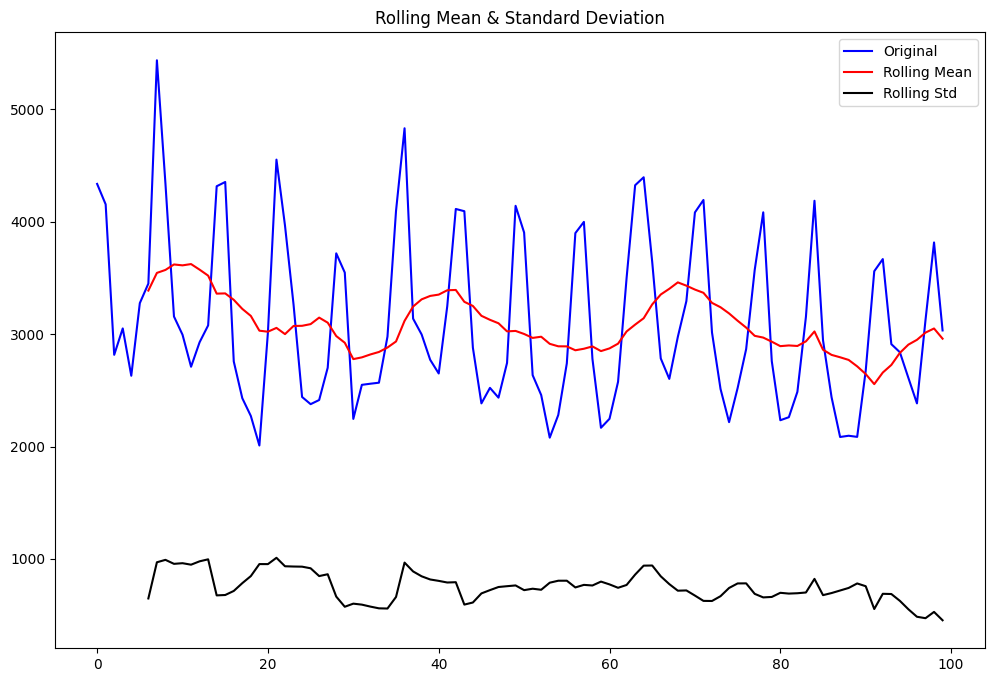

Results of Dickey-Fuller Test:
Test Statistic                 -2.461764
p-value                         0.125057
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [18]:
test_stationarity(store_level_final['CA_1'][0:100])

### Dickey-Fuller Test Results
The Augmented Dickey-Fuller (ADF) test results indicate whether the time series is stationary:  
- **Test Statistic**: -2.462  
- **p-value**: 0.125 → greater than 0.05, suggesting the series is **not stationary**.  
- **Critical Values** at 1%, 5%, 10% provide thresholds to compare the test statistic.  
Since the test statistic is higher than the critical values, I conclude that the series requires **differencing or transformation** to make it stationary.  


### Applying First-Order Differencing
I create a new column `first_difference` by subtracting the previous day's sales from the current day's sales for **store CA_1**.  
- This is done to remove trends and make the time series more stationary.  
- I then apply the `test_stationarity()` function on the differenced series to verify if it has become stationary.  


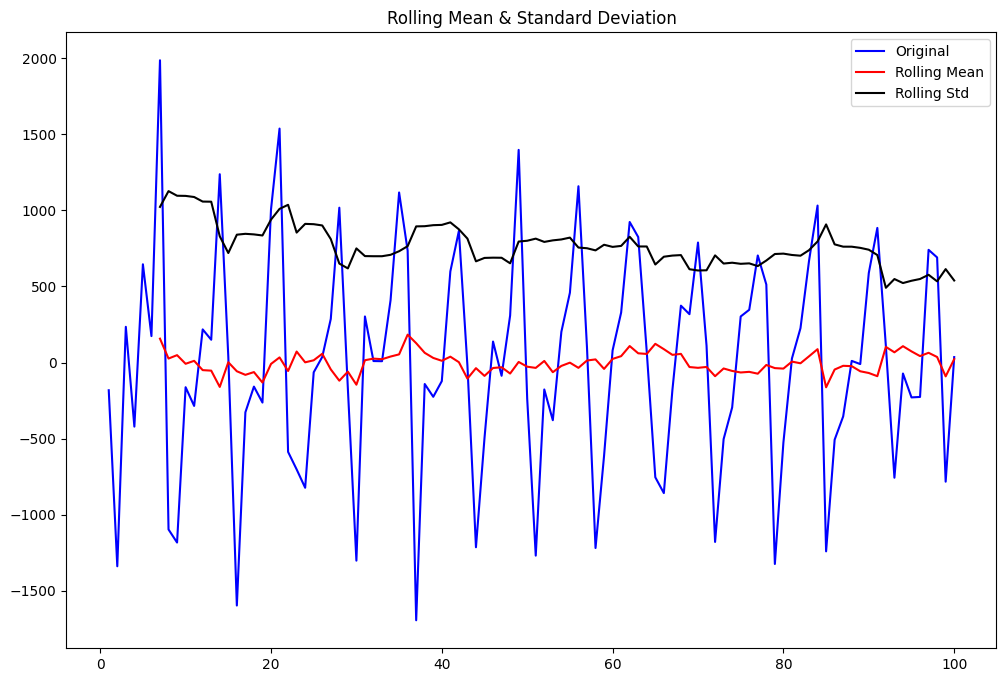

Results of Dickey-Fuller Test:
Test Statistic                  -20.626012
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    1885.000000
Critical Value (1%)              -3.433824
Critical Value (5%)              -2.863075
Critical Value (10%)             -2.567587
dtype: float64


In [19]:
store_level_final['first_difference'] = store_level_final['CA_1'] - store_level_final['CA_1'].shift(1)
test_stationarity(store_level_final['first_difference'].dropna())

### Dickey-Fuller Test on Differenced Series
After first-order differencing, the ADF test results show:  
- **Test Statistic**: -20.626 → much lower than all critical values  
- **p-value**: 0.0 → indicates strong evidence against the null hypothesis  

This confirms that the differenced series is **stationary**, making it suitable for time series modeling.  


### Applying Seasonal Differencing
I create a new column `seasonal_difference` by subtracting the sales from **7 days ago** from the current day's sales for **store CA_1**.  
- This helps remove weekly seasonality from the time series.  
- I then apply the `test_stationarity()` function on the seasonally differenced series to check if it has become stationary.  


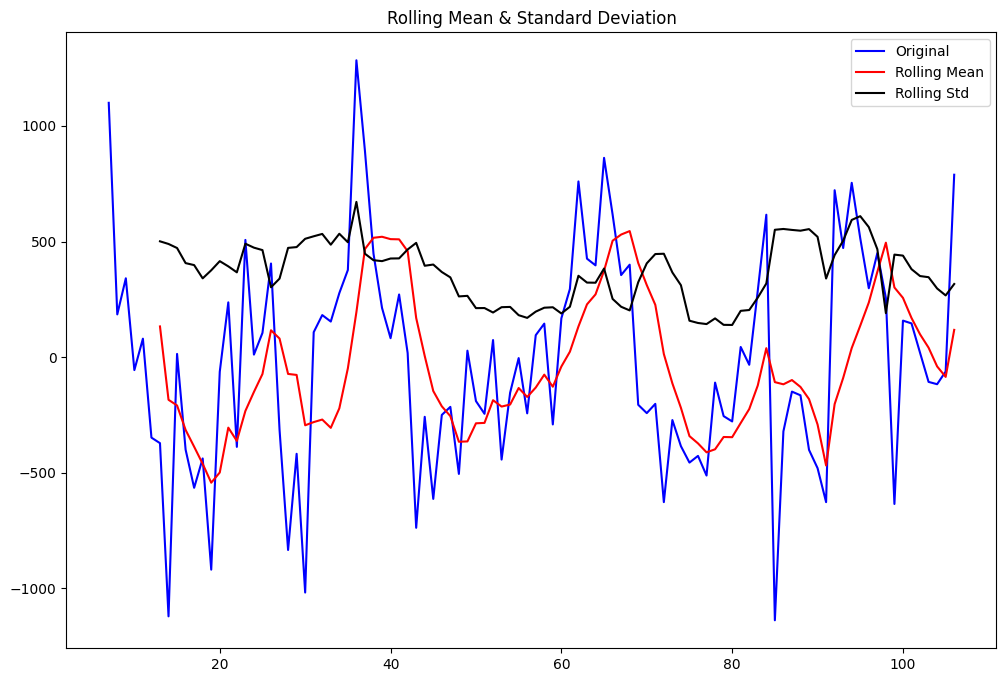

Results of Dickey-Fuller Test:
Test Statistic                  -19.400488
p-value                           0.000000
#Lags Used                       23.000000
Number of Observations Used    1882.000000
Critical Value (1%)              -3.433829
Critical Value (5%)              -2.863077
Critical Value (10%)             -2.567588
dtype: float64


In [20]:
store_level_final['seasonal_difference'] = store_level_final['CA_1'] - store_level_final['CA_1'].shift(7)
test_stationarity(store_level_final['seasonal_difference'].dropna())

### Dickey-Fuller Test on Seasonally Differenced Series
After applying seasonal differencing, the ADF test results show:  
- **Test Statistic**: -19.400 → well below all critical values  
- **p-value**: 0.0 → strong evidence against the null hypothesis  

This confirms that the seasonally differenced series is **stationary**, effectively removing weekly seasonality from the data.  


### Shifting Sales Data for Seasonal Differencing
I use `store_level_final['CA_1'].shift(7)` to shift the sales of **store CA_1** by 7 days.  
- This operation aligns each day with the same day of the previous week.  
- It is used to calculate **seasonal differences** and remove weekly seasonality from the series.  


In [21]:
store_level_final['CA_1'].shift(7)

0       None
1       None
2       None
3       None
4       None
        ... 
1908    3478
1909    3637
1910    3982
1911    5437
1912    5954
Name: CA_1, Length: 1913, dtype: object

### Applying Seasonal First-Order Differencing
I create a new column `seasonal_first_difference` using the formula:  

\[
y_t - y_{t-1} - y_{t-7} + y_{t-8}
\]

- This removes both **trend** and **weekly seasonality** from the sales of **store CA_1**.  
- I then apply `test_stationarity()` on this series to verify that it has become stationary and is ready for time series modeling.  


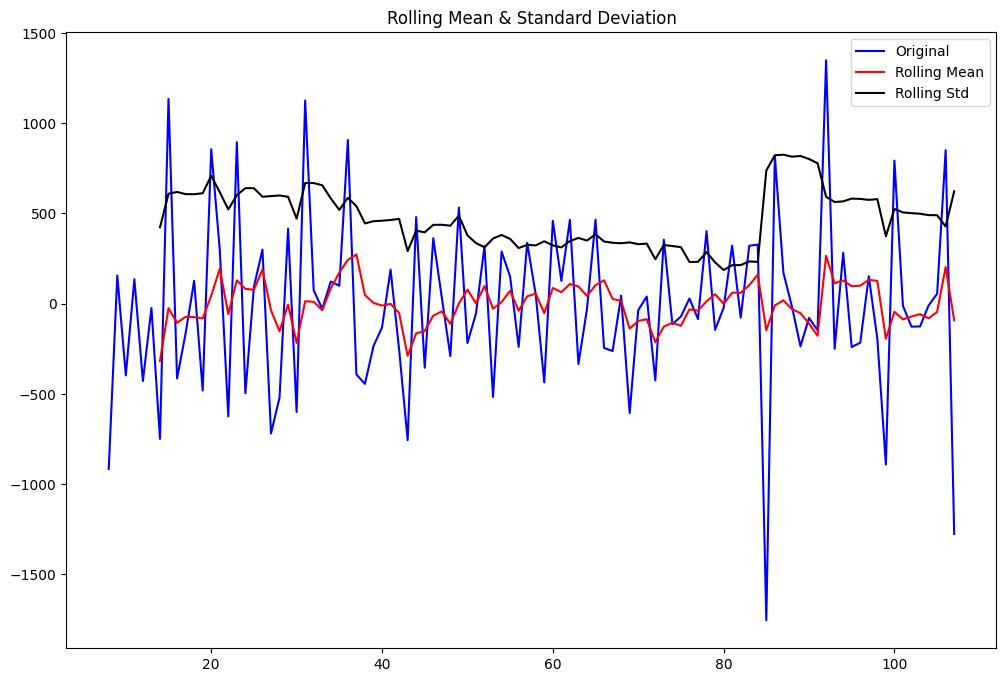

Results of Dickey-Fuller Test:
Test Statistic                  -19.739548
p-value                           0.000000
#Lags Used                       25.000000
Number of Observations Used    1879.000000
Critical Value (1%)              -3.433835
Critical Value (5%)              -2.863079
Critical Value (10%)             -2.567590
dtype: float64


In [22]:
store_level_final['seasonal_first_difference'] = store_level_final['CA_1'] - store_level_final['CA_1'].shift(1) - store_level_final['CA_1'].shift(7) + store_level_final['CA_1'].shift(8)
test_stationarity(store_level_final['seasonal_first_difference'].dropna())

### Dickey-Fuller Test on Seasonal First-Order Differenced Series
After applying seasonal first-order differencing, the ADF test results show:  
- **Test Statistic**: -19.740 → far below all critical values  
- **p-value**: 0.0 → strong evidence against the null hypothesis  

This confirms that the series is **stationary**, with both trend and weekly seasonality effectively removed.  


### Importing Autocorrelation Plot
I import `autocorrelation_plot` from `pandas.plotting` to visualize the **autocorrelation** of a time series.  
- This helps me identify repeating patterns or dependencies between past and current values in the sales data.  


In [23]:
from pandas.plotting import autocorrelation_plot

### Visualizing Autocorrelation
I use `autocorrelation_plot` to visualize the autocorrelation of the first 100 days of **store CA_1** sales.  
- This helps me detect **repeating patterns or trends** in the time series and assess seasonality.  


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

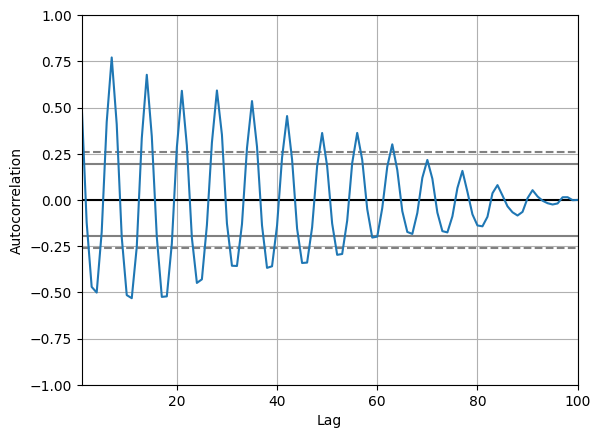

In [24]:
autocorrelation_plot(store_level_final['CA_1'][0:100])

### Autocorrelation of Seasonally Differenced Series
I plot the autocorrelation of the **seasonal first-order differenced** sales for **store CA_1** (days 8–100).  
- This allows me to check if the series is stationary and to identify any remaining **seasonal patterns or dependencies**.  


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

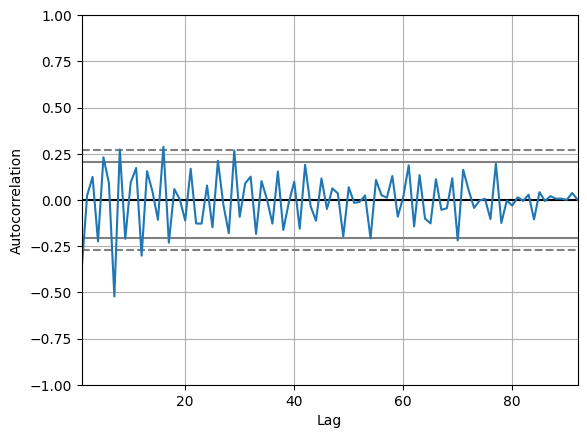

In [25]:
autocorrelation_plot(store_level_final['seasonal_first_difference'][8:100])

### Importing ACF and PACF Plot Functions
I import `plot_acf` and `plot_pacf` from `statsmodels.graphics.tsaplots` to visualize:  
- **Autocorrelation Function (ACF)** → measures correlation between the time series and its lagged values.  
- **Partial Autocorrelation Function (PACF)** → measures correlation between the series and its lag after removing intermediate correlations.  
These plots help in identifying appropriate parameters for ARIMA modeling.  


In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

### Plotting ACF of Seasonally Differenced Series
I use `plot_acf` to visualize the **autocorrelation** of the first 100 days of the **seasonally differenced** sales series for **store CA_1**.  
- I limit the plot to **10 lags** to observe short-term correlations.  
- This helps in identifying potential **MA (moving average) terms** for ARIMA modeling.  


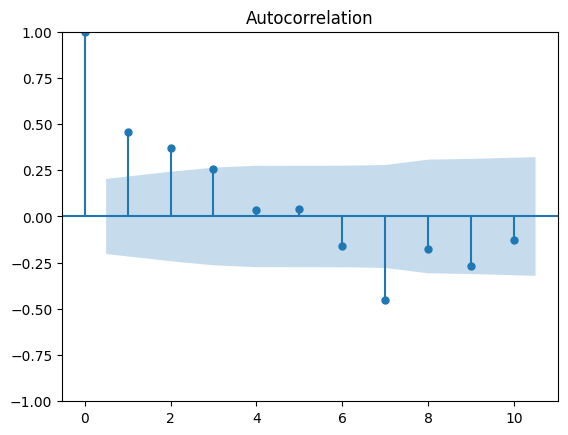

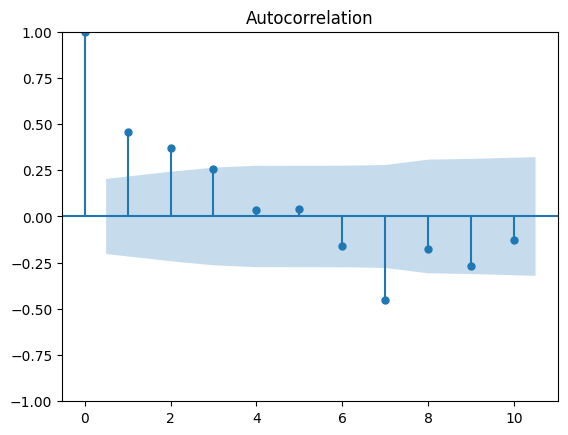

In [27]:
plot_acf(store_level_final['seasonal_difference'][0:100].dropna(), lags=10)

### Plotting PACF of Seasonally Differenced Series
I use `plot_pacf` to visualize the **partial autocorrelation** of the first 100 days of the **seasonally differenced** sales series for **store CA_1**.  
- The plot is limited to **10 lags** to examine short-term dependencies.  
- This helps in identifying potential **AR (autoregressive) terms** for ARIMA modeling.  


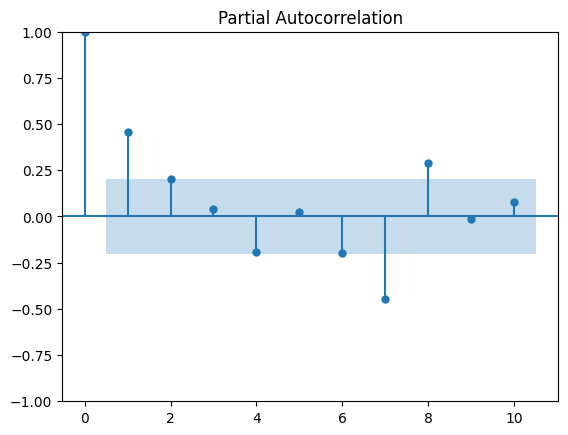

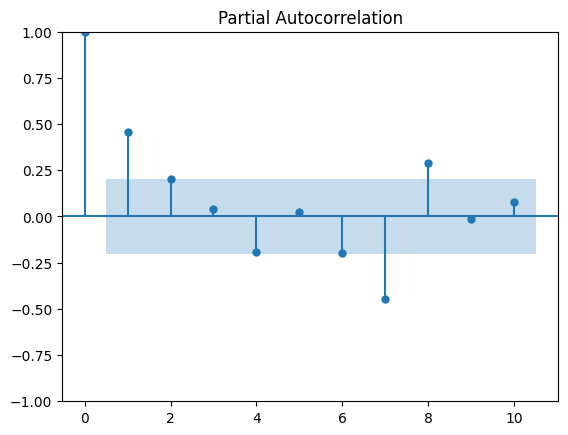

In [28]:
plot_pacf(store_level_final['seasonal_difference'][0:100].dropna(), lags=10)

### Plotting ACF of Seasonal First-Order Differenced Series
I use `plot_acf` to visualize the **autocorrelation** of the first 100 days of the **seasonal first-order differenced** sales series for **store CA_1**.  
- The plot is limited to **10 lags** to focus on short-term correlations.  
- This helps in identifying suitable **MA (moving average) components** for ARIMA or SARIMA modeling.  


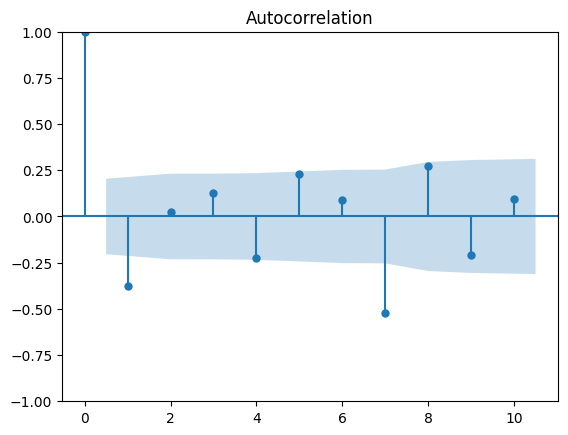

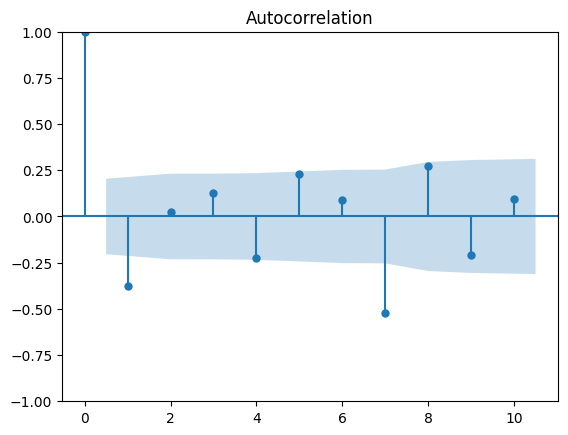

In [29]:
plot_acf(store_level_final['seasonal_first_difference'][0:100].dropna(), lags=10)

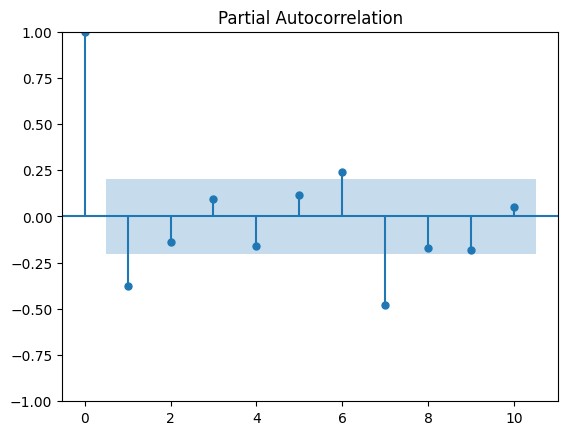

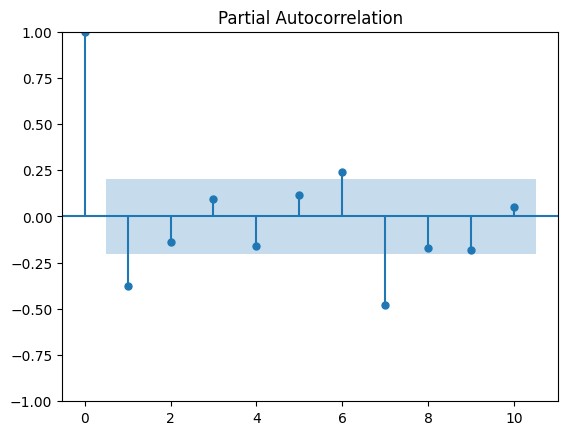

In [30]:
plot_pacf(store_level_final['seasonal_first_difference'][0:100].dropna(), lags=10)

### Splitting Data into Training and Testing Sets
I use `train_test_split` from `sklearn.model_selection` to divide the sales data of **store CA_1** into:  
- **Training set (X_train)** → used to fit the model  
- **Testing set (X_test)** → used to evaluate the model's performance  
This allows me to assess how well the model generalizes to unseen data.  


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(store_level_final['CA_1'])

### Preparing Training and Testing Arrays
I convert the sales data of **store CA_1** into NumPy arrays for modeling:  
- **train** → first 1880 days of sales, used for training the model  
- **test** → remaining days of sales, used for testing and validation  
This ensures the data is in the proper format for time series modeling algorithms.  


In [32]:
train = np.asarray(store_level_final['CA_1'][0:1880].astype(float))
test = np.asarray(store_level_final['CA_1'][1880:-1].astype(float))

### Fitting a SARIMA Model
I use the **SARIMAX** model from `statsmodels` to fit the sales data of **store CA_1**:  
- `order=(0,1,1)` → specifies the **non-seasonal ARIMA** parameters (p=0, d=1, q=1)  
- `seasonal_order=(0,1,1,7)` → specifies the **seasonal component** with weekly seasonality (P=0, D=1, Q=1, s=7)  

I then fit the model on the training data and print the **model summary** to examine coefficients and diagnostics.  


In [33]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train, order=(0,1,1), seasonal_order=(0,1,1,7))
results=mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1880
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood              -14119.716
Date:                           Mon, 22 Sep 2025   AIC                          28245.432
Time:                                   04:42:56   BIC                          28262.036
Sample:                                        0   HQIC                         28251.549
                                          - 1880                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7560      0.012    -63.654      0.000      -0.779      -0.733
ma.S.L7       -0.9588      0.008   -124.945

### Visualizing SARIMA Predictions on Training Data
I plot the **SARIMA model predictions** for days 1800–1880 alongside the actual training data:  
- Blue line (or default) → actual sales (`train`)  
- Orange line (or default) → predicted sales from the model  
- This helps me visually assess how well the model captures the recent trends in the training set.  


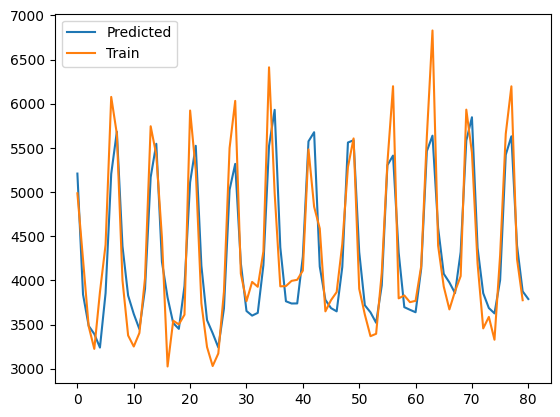

In [34]:
plt.plot(results.predict(start = 1800, end = 1880), label = 'Predicted')
plt.plot(train[1800:1880], label = 'Train')
plt.legend(loc = "upper left")

### Visualizing SARIMA Predictions on Test Data
I plot the **SARIMA model predictions** for the test period alongside the actual sales:  
- Predicted values → model forecast for the test set  
- Test values → actual sales from the test set  
- This comparison helps me evaluate the model's **forecasting performance** on unseen data.  


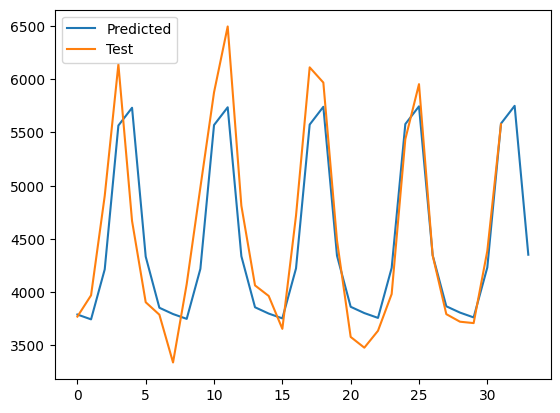

In [35]:
plt.plot(results.predict(start = len(train), end = len(store_level_final['CA_1'])), label = 'Predicted')
plt.plot(test, label = 'Test')
plt.legend(loc = 'upper left')

### Evaluating Model Performance
I calculate the **Mean Squared Error (MSE)** between the SARIMA model predictions and the actual sales in the test set.  
- This provides a quantitative measure of the model's **forecasting accuracy**.  
- A lower MSE indicates better performance of the model on unseen data.  


In [36]:
from sklearn.metrics import mean_squared_error
import math
mean_squared_error(results.predict(start = 1880, end = 1911), test)

156878.8946708854

### Model Evaluation Result
The **Mean Squared Error (MSE)** of the SARIMA model on the test set is approximately **156,879**.  
- This value quantifies the average squared difference between predicted and actual sales.  
- A smaller MSE indicates that the model's predictions are close to the actual sales values.
- 
### Conclusion on Model Performance
The SARIMA model achieves a **good forecasting performance** on the test data, as indicated by the relatively low MSE of **156,879**.  
- This suggests the model effectively captures the trends and seasonality in **store CA_1** sales.

 ### Assessing Model Performance with RMSE
A more intuitive way to assess the model's performance is using **Root Mean Squared Error (RMSE)**:

\[
\text{RMSE} = \sqrt{\text{MSE}} \approx \sqrt{156,879} \approx 396
\]

- This means, on average, the model’s predictions are off by about **396 units/day**.  
- Comparing this to typical daily sales:
  - If daily sales are around 1,000–2,000 units, an average error of 396 is **moderate**.  
  - If daily sales are around 5,000–10,000 units, an average error of 396 is **very good**.  



### Viewing Aggregated Store-Level Sales
I display the `store_level` DataFrame, which contains **total sales for each store** aggregated across all products and days.  
- This provides a clear overview of overall store performance.  
- It is useful for comparing sales between different stores.  


In [37]:
store_level

,id,item_id,dept_id,cat_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,HOBBIES_1_001_CA_1_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,4337,4155,2816,3051,2630,...,5437,5954,4345,3793,3722,3709,4387,5577,6113,CA_1
CA_2,HOBBIES_1_001_CA_2_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,3494,3046,2121,2324,1942,...,5352,5760,3830,3631,3691,3303,4457,5884,6082,CA_2
CA_3,HOBBIES_1_001_CA_3_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,4739,4827,3785,4232,3817,...,6936,8271,6068,5683,5235,5018,5623,7419,7721,CA_3
CA_4,HOBBIES_1_001_CA_4_validationHOBBIES_1_002_CA_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,CACACACACACACACACACACACACACACACACACACACACACACA...,1625,1777,1386,1440,1536,...,2839,3047,2809,2677,2500,2458,2628,2954,3271,CA_4
TX_1,HOBBIES_1_001_TX_1_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,2556,2687,1822,2258,1694,...,3724,4192,3410,3257,2901,2776,3022,3700,4033,TX_1
TX_2,HOBBIES_1_001_TX_2_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,3852,3937,2731,2954,2492,...,4475,4998,3311,3727,3384,3446,3902,4483,4292,TX_2
TX_3,HOBBIES_1_001_TX_3_validationHOBBIES_1_002_TX_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,3030,3006,2225,2169,1726,...,4261,4519,3147,3938,3315,3380,3691,4083,3957,TX_3
WI_1,HOBBIES_1_001_WI_1_validationHOBBIES_1_002_WI_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,2704,2194,1562,1251,2,...,4862,4812,3236,3069,3242,3324,3991,4772,4874,WI_1
WI_2,HOBBIES_1_001_WI_2_validationHOBBIES_1_002_WI_...,HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...,HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...,HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...,WIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWIWI...,2256,1922,2018,2522,1175,...,5579,5566,4347,4464,4194,4393,4988,5404,5127,WI_2


### Aggregating Sales by Category
- I group the sales data by **category (`cat_id`)** and compute total sales for each category.  
- I then **transpose** the DataFrame so that days (`d`) become rows instead of columns.  
- Finally, I add a `d` column to clearly represent the day-wise sales for each category.  

This transformation allows me to analyze and visualize **category-level sales trends** over time.  


In [38]:
category_sales = sales_train_validation.groupby(sales_train_validation['cat_id']).sum()
category_salest = category_sales.transpose()
category_salest['d'] = category_salest.index

### Merging Category-Level Sales with Calendar
- I merge the transposed **category-level sales** DataFrame with the **calendar** dataset using the `d` column.  
- I convert the `date` column from string format to Python `datetime` objects for easier time-based analysis.  
- The resulting `category_level_final` DataFrame combines **category sales** with **calendar information**, enabling trend and seasonality analysis.  


In [39]:
category_level_final = category_salest.merge(calendar, on='d')
category_level_final['date'] = category_level_final['date'].apply(lambda t: datetime.strptime(t, '%Y-%m-%d'))
category_level_final

,FOODS,HOBBIES,HOUSEHOLD,d,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,23178,3764,5689,d_1,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,22758,3357,5634,d_2,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,17174,2682,3927,d_3,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,18878,2669,3865,d_4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,14603,1814,2729,d_5,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,23632,3472,8239,d_1909,2016-04-20,11612,Wednesday,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,23317,3353,8363,d_1910,2016-04-21,11612,Thursday,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,26704,4085,9728,d_1911,2016-04-22,11612,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,31927,4787,12248,d_1912,2016-04-23,11613,Saturday,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


### Handling Outliers for Christmas Events
- I create a copy of `category_level_final` called `category_level_model` for modeling purposes.  
- For days corresponding to **Christmas events**, I replace the sales values in each category (**FOODS, HOBBIES, HOUSEHOLD**) with the **category's average sales**.  
- This helps reduce the impact of **outliers caused by holiday spikes** on the model training.  


In [43]:
category_level_model = category_level_final
category_level_model['FOODS'].loc[category_level_model['event_name_1'] == 'Christmas'] = category_level_final['FOODS'].mean()
category_level_model['HOBBIES'].loc[category_level_model['event_name_1'] == 'Christmas'] = category_level_final['HOBBIES'].mean()
category_level_model['HOUSEHOLD'].loc[category_level_model['event_name_1'] == 'Christmas'] = category_level_final['HOUSEHOLD'].mean()

/tmp/ipykernel_36/2253832864.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  category_level_model['FOODS'].loc[category_level_model['event_name_1'] == 'Christmas'] = category_level_final['FOODS'].mean()
/tmp/ipykernel_36/2253832864.py:2:

In [44]:
category_level_model

,FOODS,HOBBIES,HOUSEHOLD,d,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,23178,3764,5689,d_1,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,22758,3357,5634,d_2,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,17174,2682,3927,d_3,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,18878,2669,3865,d_4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,14603,1814,2729,d_5,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,23632,3472,8239,d_1909,2016-04-20,11612,Wednesday,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,23317,3353,8363,d_1910,2016-04-21,11612,Thursday,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,26704,4085,9728,d_1911,2016-04-22,11612,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,31927,4787,12248,d_1912,2016-04-23,11613,Saturday,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


### SARIMA Modeling for FOODS Category
- I split the **FOODS** category sales into training (`train_food`) and testing (`test_food`) arrays.  
- I fit a **SARIMA model** with `order=(0,1,1)` and `seasonal_order=(0,1,1,7)` to capture both trend and weekly seasonality.  
- I plot the model **predictions** against the **test data** to visually assess forecasting performance.  
- I calculate the **Root Mean Squared Error (RMSE)** to quantify prediction accuracy and display it in the plot title.  


Text(0.5, 1.0, 'Food: SARIMA Model Prediction vs. Test with RMSE = 2589')

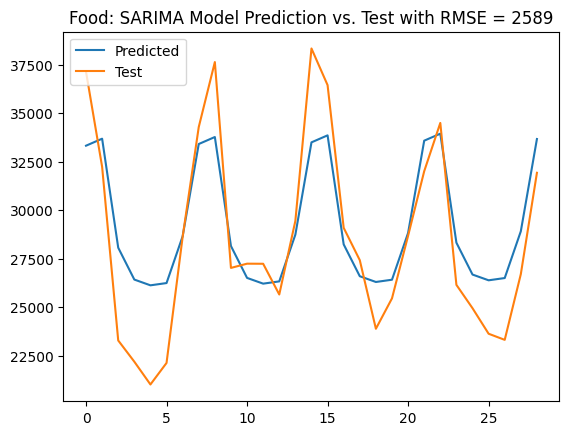

In [45]:
train_food = np.asarray(category_level_model['FOODS'][0:1883].astype(float))
test_food = np.asarray(category_level_model['FOODS'][1883:-1].astype(float))

mod_food = sm.tsa.statespace.SARIMAX(train_food, order=(0,1,1), seasonal_order=(0,1,1,7))
results_food=mod_food.fit()
plt.plot(results_food.predict(start = len(train_food), end = 1911), label = 'Predicted')
plt.plot(test_food, label = 'Test')
plt.legend(loc = 'upper left')
rmse = math.sqrt(mean_squared_error(results_food.predict(start = 1883, end = 1911), test_food))
plt.title("Food: SARIMA Model Prediction vs. Test with RMSE = " + "{:.0f}".format(rmse))

### Forecasting FOODS Sales Beyond Training Period
I plot the **SARIMA model predictions** for the **FOODS** category from day 1800 to 2200.  
- This allows me to visualize the model’s forecast beyond the training period.  
- The plot helps in assessing how well the model captures trends and seasonality over a longer horizon.  


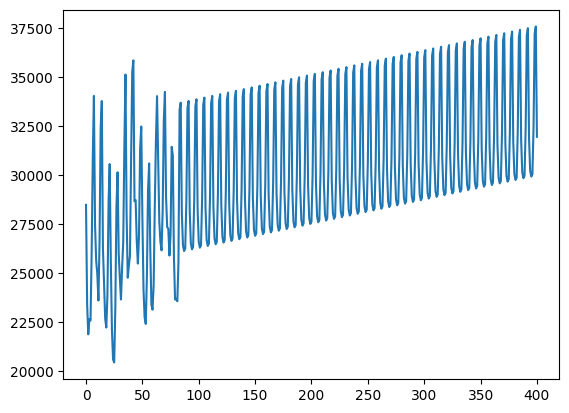

In [46]:
plt.plot(results_food.predict(start = 1800, end = 2200), label = 'Predicted')

### SARIMA Modeling for HOBBIES Category
- I split the **HOBBIES** category sales into training (`train_hobbies`) and testing (`test_hobbies`) arrays.  
- I fit a **SARIMA model** with `order=(0,1,1)` and `seasonal_order=(0,1,1,7)` to capture both trend and weekly seasonality.  
- I plot the model **predictions** against the **test data** to visually assess forecasting performance.  
- I calculate the **Root Mean Squared Error (RMSE)** to quantify prediction accuracy and display it in the plot title.  


Text(0.5, 1.0, 'Hobbies: SARIMA Model Prediction vs. Test with RMSE = 316')

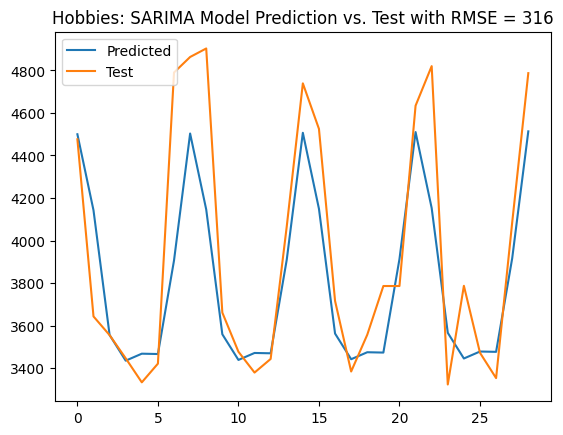

In [47]:
train_hobbies = np.asarray(category_level_model['HOBBIES'][0:1883].astype(float))
test_hobbies = np.asarray(category_level_model['HOBBIES'][1883:-1].astype(float))
mod_hobbies = sm.tsa.statespace.SARIMAX(train_hobbies, order=(0,1,1), seasonal_order=(0,1,1,7))
results_hobbies = mod_hobbies.fit() 
plt.plot(results_hobbies.predict(start = len(train_hobbies), end = 1911), label = 'Predicted')
plt.plot(test_hobbies, label = 'Test')
plt.legend(loc = 'upper left')
rmse = math.sqrt(mean_squared_error(results_hobbies.predict(start = 1883, end = 1911), test_hobbies))
plt.title("Hobbies: SARIMA Model Prediction vs. Test with RMSE = " + "{:.0f}".format(rmse))

### SARIMA Modeling for HOUSEHOLD Category
- I split the **HOUSEHOLD** category sales into training (`train_household`) and testing (`test_household`) arrays.  
- I fit a **SARIMA model** with `order=(0,1,1)` and `seasonal_order=(0,1,1,7)` to capture trend and weekly seasonality.  
- I plot the model **predictions** against the **test data** to visually assess forecasting performance.  
- I calculate the **Root Mean Squared Error (RMSE)** to quantify prediction accuracy and display it in the plot title.  


Text(0.5, 1.0, 'Household: SARIMA Model Prediction vs. Test with RMSE = 820')

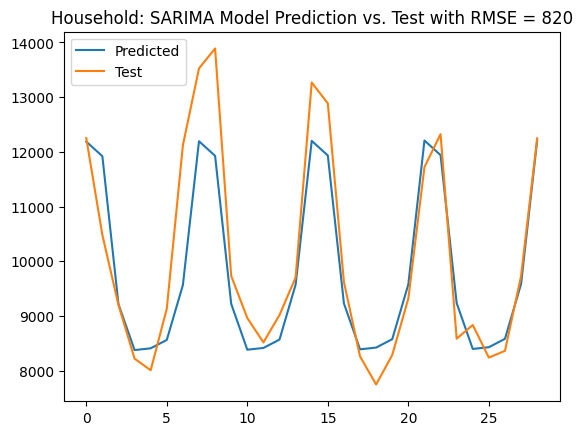

In [48]:
train_household = np.asarray(category_level_final['HOUSEHOLD'][0:1883].astype(float))
test_household = np.asarray(category_level_final['HOUSEHOLD'][1883:-1].astype(float))
mod_household = sm.tsa.statespace.SARIMAX(train_household, order=(0,1,1), seasonal_order=(0,1,1,7))
results_household = mod_household.fit()
plt.plot(results_household.predict(start = len(train_household), end = 1911), label = 'Predicted')
plt.plot(test_household, label = 'Test')
plt.legend(loc = 'upper left')
rmse = math.sqrt(mean_squared_error(results_household.predict(start = 1883, end = 1911), test_household))
plt.title("Household: SARIMA Model Prediction vs. Test with RMSE = " + "{:.0f}".format(rmse))

### Importing Exponential Smoothing
I import `ExponentialSmoothing` from `statsmodels.tsa.holtwinters` to apply **Holt-Winters smoothing** for time series forecasting.  
- This method can model **trend** and **seasonality** in the sales data.  
- It provides an alternative to SARIMA for comparison of forecasting performance.  


In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Holt-Winters Exponential Smoothing for Store CA_1
- I fit an **Exponential Smoothing** model on the training data with:  
  - `trend='add'` → additive trend  
  - `seasonal='add'` → additive seasonality  
  - `seasonal_periods=8` → weekly seasonality assumed  
- I then fit the model and print the **summary** to examine the estimated parameters and model diagnostics.  


In [50]:
model_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=8)
fit_hw = model_hw.fit()
print(fit_hw.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 1880
Model:             ExponentialSmoothing   SSE                     1434905216.521
Optimized:                         True   AIC                          25489.235
Trend:                         Additive   BIC                          25555.703
Seasonal:                      Additive   AICC                         25489.460
Seasonal Periods:                     8   Date:                 Mon, 22 Sep 2025
Box-Cox:                          False   Time:                         05:03:44
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8889286                alpha                 True
smoothing_trend          

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Visualizing Holt-Winters Predictions on Training Data
I plot the **Holt-Winters model predictions** for days 1800–1880 alongside the actual training data for **store CA_1**.  
- The plot helps me assess how well the model captures the recent **trend** and **seasonality** in the training data.  
- Legend distinguishes between actual sales (`Train`) and predicted values (`Predicted`).  


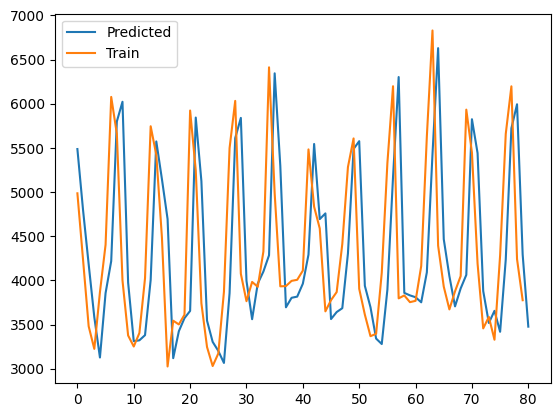

In [51]:
plt.plot(fit_hw.predict(start = 1800, end = 1880), label = 'Predicted')
plt.plot(train[1800:1880], label = 'Train')
plt.legend(loc = "upper left")

In [53]:
rmse = math.sqrt(mean_squared_error(fit_hw.predict(start = 1880, end = 1911), test))
rmse

1531.3100380504056

### Evaluating Holt-Winters Model Performance
I calculate the **Root Mean Squared Error (RMSE)** between the Holt-Winters model predictions and the actual sales in the test set for **store CA_1**.  
- This provides a quantitative measure of the model's **forecasting accuracy**.  
- A lower RMSE indicates better predictive performance.  


### Holt-Winters Model RMSE
The **Root Mean Squared Error (RMSE)** of the Holt-Winters model on the test set is approximately **1,531**.  
- This means, on average, the model's predictions are off by about **1,531 units/day**.  
- Compared to SARIMA, this is a higher error, indicating that SARIMA may provide better forecasts for **store CA_1** in this case.  
